In [16]:
from astropy.io import fits

# Open a FITS file
hdulist = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_B.fits")

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
hdulist.close()  # Close the FITS file

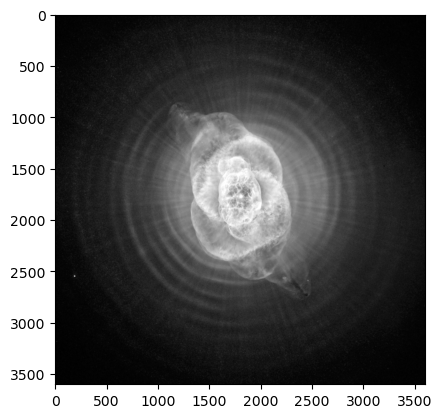

In [17]:
import matplotlib.pyplot as plt
plt.imshow(data, cmap='gray')
plt.show()
header = hdulist[0].header

In [18]:
# Print the header information
print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 3600 / length of data axis 1                          NAXIS2  =                 3600 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BZERO   =                32768 / offset data range to that of unsigned short    BSCALE  =                    1 / default scaling factor                         PROGRAM = 'PixInsight 01.08.03.1123' / Software that created this HDU           COMMENT PixInsight Class Library: PCL 02.00.13.0692                             COMMENT FITS module version 01.01.02.028

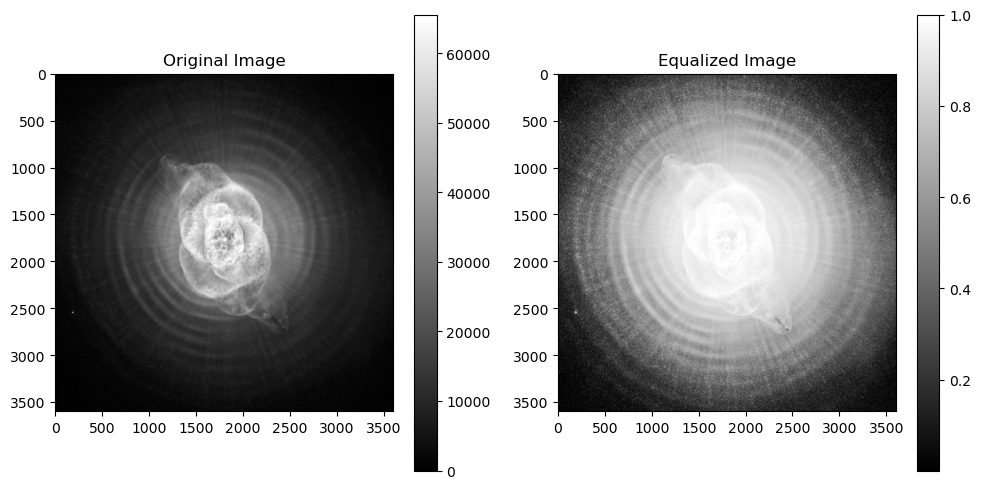

In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure

# Open a FITS file
hdulist = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_B.fits")

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()

# Perform histogram equalization to enhance image contrast
data_equalized = exposure.equalize_hist(data)

# Display the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

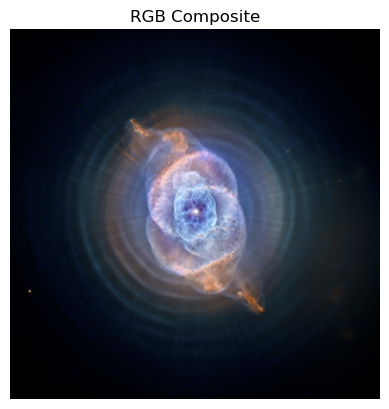

In [12]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_R.fits")
hdulist_green = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_G.fits")
hdulist_blue = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_B.fits")

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Normalize each channel's data to the [0, 1] range
data_red_normalized = (data_red - data_red.min()) / (data_red.max() - data_red.min())
data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())

# Stack the channels to create the RGB composite
rgb_image = np.dstack((data_red_normalized, data_green_normalized, data_blue_normalized))

# Display the RGB composite
plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()


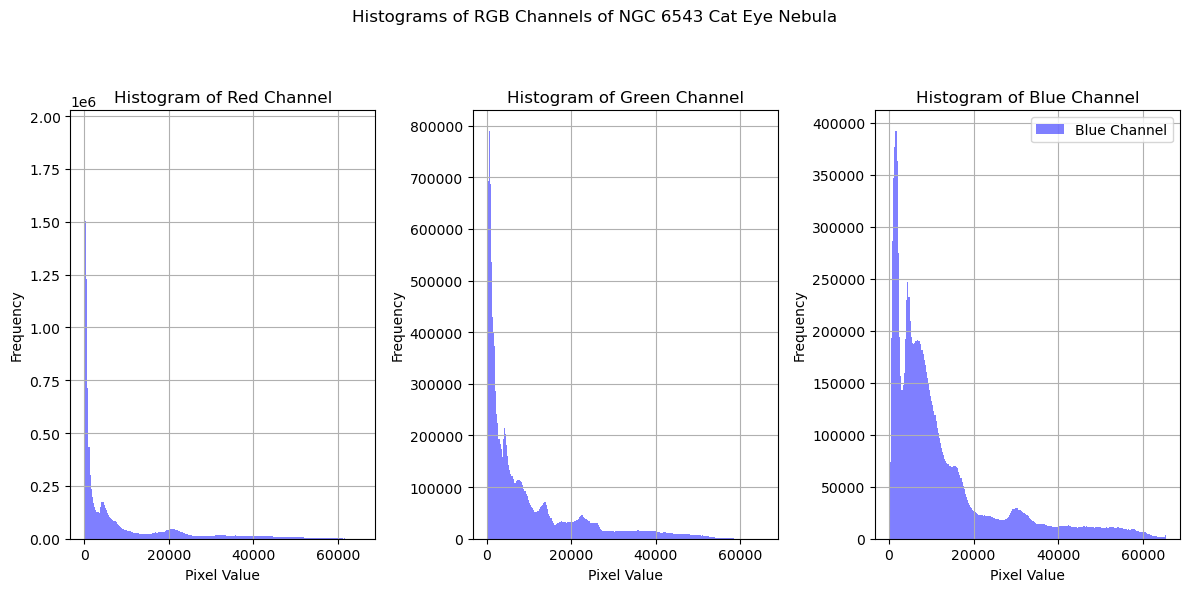

In [25]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to create and display histograms
def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_R.fits")
hdulist_green = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_G.fits")
hdulist_blue = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_B.fits")

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data


# Create histograms for each channel
plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_green,  'Green Channel', 'Histogram of Green Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels of NGC 6543 Cat Eye Nebula', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

In [27]:
import numpy as np
from astropy.io import fits

# Function to compute and display statistics
def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    # Remove negative values and convert the data to integers by rounding to the nearest integer
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0]  # Remove negative values
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)  # Calculate standard deviation
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_R.fits")
hdulist_green = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_G.fits")
hdulist_blue = fits.open(r"C:\Users\Mufeez\Documents\DIP Lab\ngc6543_optical_B.fits")

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Compute and display statistics for each channel
compute_statistics(data_red, 'Red')
compute_statistics(data_green, 'Green')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 8028.87
Median: 1799.00
Mode: 0.0

Standard Deviation: 12411.85

Statistics for Green Channel:
Mean: 9390.34
Median: 4369.00
Mode: 514.0

Standard Deviation: 11777.97

Statistics for Blue Channel:
Mean: 12648.52
Median: 7967.00
Mode: 1542.0

Standard Deviation: 13522.45

